Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

### Importação das bibliotecas 

In [1]:
import numpy as np # álgebra linear 
import pandas as pd # processamento de dados

import matplotlib.pyplot as plt # visualização de dados

# algoritmos de análise associativa
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Q1 -  Leia o arquivo. Mantenha apenas os atributos sex, age, Pstatus, health, absences e G3 e mais outros 4 atributos que na sua opinião podem ter mais impacto na qualidade de estudo e desempeho do estudante. 

#### Leitura dos dados

In [2]:
colunas = ['school', 'sex', 'age', 'Pstatus', 'studytime', 'activities', 'internet', 'health', 'absences', 'G3']
df = pd.read_csv('student-por.csv', sep=';', usecols=colunas)

In [3]:
df.head()

,school,sex,age,Pstatus,studytime,activities,internet,health,absences,G3
0,GP,F,18,A,2,no,no,3,4,11
1,GP,F,17,T,2,no,yes,3,2,11
2,GP,F,15,T,2,no,yes,3,6,12
3,GP,F,15,T,3,yes,yes,5,0,14
4,GP,F,16,T,2,no,no,5,0,13


### Q2 - Para os atributos numéricos com valores contínuos, é necessário primeiramente discretizá-los. Mostre o gráfico da distribuição dos atributos numéricos e discretize usando a função cut do pandas. 

#### Distribuição dos valores das features numéricas 

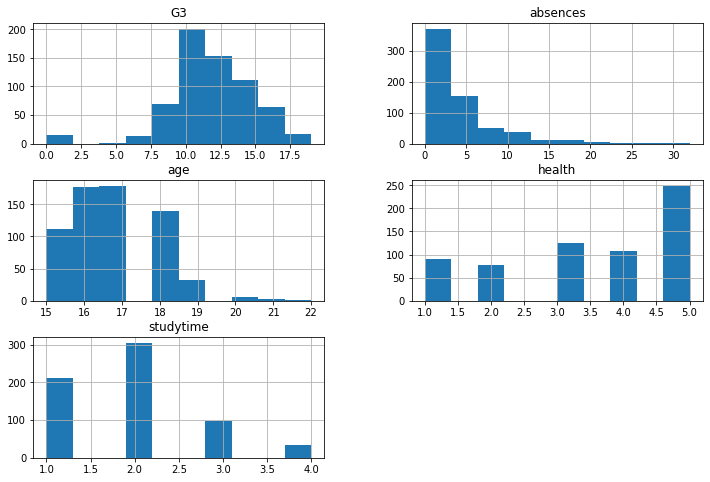

In [4]:
df[['age', 'studytime', 'health', 'absences', 'G3']].hist(figsize=(12,8));

#### Discretização

In [5]:
df['studytime'] = pd.cut(df['studytime'], bins=4, labels=['studytime = low', 'studytime = medium', 'studytime = high', 'studytime = very high'])
df['health'] = pd.cut(df['health'], bins=5, labels=['health = very bad', 'health = bad', 'health = normal', 'health = good', 'health = very good'])
df['age'] = pd.qcut(df['age'], q=3, labels=['age = 15-16', 'age = 16-17', 'age = 17-22'] )
df['G3'] = pd.qcut(df['G3'], q=8, labels=['G3 = nv-1','G3 = nv-2', 'G3 = nv-3', 'G3 = nv-4', 'G3 = nv-5', 'G3 = nv-6', 'G3 = nv-7', 'G3 = nv-8'])
df['absences'] = pd.cut(df['absences'], bins=4, labels=['absences = acceptable', 'absences = worrisome', 'absences = bad', 'absences = very bad'])

### Renomeação dos valores para identificação das regras

A renomeação é feita para a melhor identificação dos valores na etapa pós geração de regras

In [6]:
df['school'] = df['school'].apply(lambda x: 'school = '+ x)
df['sex'] = df['sex'].apply(lambda x: 'sex = '+ x)
df['Pstatus'] = df['Pstatus'].apply(lambda x: 'Psatus = '+ x)
df['activities'] = df['activities'].apply(lambda x: 'activities = '+ x)
df['internet'] = df['internet'].apply(lambda x: 'internet = '+ x)

In [7]:
df.head()

,school,sex,age,Pstatus,studytime,activities,internet,health,absences,G3
0,school = GP,sex = F,age = 17-22,Psatus = A,studytime = medium,activities = no,internet = no,health = normal,absences = acceptable,G3 = nv-3
1,school = GP,sex = F,age = 16-17,Psatus = T,studytime = medium,activities = no,internet = yes,health = normal,absences = acceptable,G3 = nv-3
2,school = GP,sex = F,age = 15-16,Psatus = T,studytime = medium,activities = no,internet = yes,health = normal,absences = acceptable,G3 = nv-4
3,school = GP,sex = F,age = 15-16,Psatus = T,studytime = high,activities = yes,internet = yes,health = very good,absences = acceptable,G3 = nv-6
4,school = GP,sex = F,age = 15-16,Psatus = T,studytime = medium,activities = no,internet = no,health = very good,absences = acceptable,G3 = nv-5


### Q3 -  Transforme o dataset para o formato adequado para processamento na mlxtend

In [8]:
rows = df.shape[0]
items = set()
for i in range(rows):
    items = items.union(set(df.iloc[i].unique()))

In [9]:
df_ = pd.DataFrame(columns=items, data=np.zeros((rows ,len(items))))

In [10]:
df_.head()

,Psatus = T,age = 17-22,school = GP,health = very good,studytime = medium,G3 = nv-4,absences = very bad,age = 16-17,internet = no,G3 = nv-3,...,studytime = very high,health = bad,G3 = nv-2,G3 = nv-8,health = normal,studytime = high,absences = bad,G3 = nv-1,G3 = nv-6,sex = M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
for row in range(rows):
    df_.at[row, df.iloc[row].dropna()] = 1

### Q4 - Obtenha e exiba os 10 itens-sets mais  frequentes, obtidos com pelo menos três valores diferentes de suporte mínimo.

In [12]:
range_ = [0.1, 0.3, 0.5, 0.7, 0.9]
items_frequentes = dict()
for suporte in range_: 
    items_frequentes[suporte] = apriori(df_, min_support=suporte, use_colnames=True)
    print(f'Suporte: {suporte}')
    print(items_frequentes[suporte].nlargest(10, 'support'), '\n')

Suporte: 0.1
      support                                           itemsets
9    0.881356                            (absences = acceptable)
0    0.876733                                       (Psatus = T)
37   0.785824                (Psatus = T, absences = acceptable)
21   0.767334                                   (internet = yes)
48   0.681048                       (Psatus = T, internet = yes)
128  0.664099            (absences = acceptable, internet = yes)
2    0.651772                                      (school = GP)
237  0.600924  (Psatus = T, absences = acceptable, internet =...
13   0.590139                                          (sex = F)
30   0.567026                          (Psatus = T, school = GP) 

Suporte: 0.3
     support                                           itemsets
4   0.881356                            (absences = acceptable)
0   0.876733                                       (Psatus = T)
16  0.785824                (Psatus = T, absences = acceptable)
1

### Q5 - Escolha um valor de suporte mínimo que considere mais adequado baseado na questão anterior e gere as regras de associação. Explore diferentes valores de  confiança mínima.  Mostre as 5 regras obtidas com os maiores valores de confiança. 

In [13]:
regras = dict()
for confianca in range_:
    regras[confianca] = association_rules(items_frequentes[0.5], metric="confidence", min_threshold=confianca)
    print(f'Confiança: {confianca}')
    print(regras[confianca].nlargest(5, 'confidence')[['antecedents', 'consequents', 'confidence']], '\n')

Confiança: 0.1
                                antecedents              consequents  \
18  (absences = acceptable, internet = yes)             (Psatus = T)   
2                              (Psatus = T)  (absences = acceptable)   
3                   (absences = acceptable)             (Psatus = T)   
7                          (internet = yes)             (Psatus = T)   
12                                (sex = F)  (absences = acceptable)   

    confidence  
18    0.904872  
2     0.896309  
3     0.891608  
7     0.887550  
12    0.882507   

Confiança: 0.3
                                antecedents              consequents  \
18  (absences = acceptable, internet = yes)             (Psatus = T)   
2                              (Psatus = T)  (absences = acceptable)   
3                   (absences = acceptable)             (Psatus = T)   
7                          (internet = yes)             (Psatus = T)   
12                                (sex = F)  (absences = acceptable)   



### Q6 - Suporte e confiança não são suficientes para filtrar regras interessantes. O lift é uma medida de simples correlação que mede se a ocorrência de um evento A é independente da ocorrência de um evento B.

### lift 1: a ocorrência de X é independente da ocorrência de Y

### lift > 1: possível dependência entre X e Y, o que faz a regra útil para predizer futuros itens

### lift < 1: a presença X tem um efeito negativo na de Y, e vice-versa.

### Verifique os valores de lift para as regras obtidas. O que se pode concluir?

In [14]:
regras[0.5][regras[0.5].lift > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Psatus = T),(absences = acceptable),0.876733,0.881356,0.785824,0.896309,1.016966,0.013110,1.144211
3,(absences = acceptable),(Psatus = T),0.881356,0.876733,0.785824,0.891608,1.016966,0.013110,1.137233
6,(Psatus = T),(internet = yes),0.876733,0.767334,0.681048,0.776801,1.012338,0.008300,1.042415
7,(internet = yes),(Psatus = T),0.767334,0.876733,0.681048,0.887550,1.012338,0.008300,1.096192
10,(internet = yes),(school = GP),0.767334,0.651772,0.548536,0.714859,1.096794,0.048409,1.221250
11,(school = GP),(internet = yes),0.651772,0.767334,0.548536,0.841608,1.096794,0.048409,1.468919
12,(sex = F),(absences = acceptable),0.590139,0.881356,0.520801,0.882507,1.001305,0.000679,1.009793
13,(absences = acceptable),(sex = F),0.881356,0.590139,0.520801,0.590909,1.001305,0.000679,1.001883
17,"(Psatus = T, internet = yes)",(absences = acceptable),0.681048,0.881356,0.600924,0.882353,1.001131,0.000679,1.008475
18,"(absences = acceptable, internet = yes)",(Psatus = T),0.664099,0.876733,0.600924,0.904872,1.032095,0.018687,1.295802


In [15]:
regras[0.5][regras[0.5].lift == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [16]:
regras[0.5][regras[0.5].lift < 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Psatus = T),(school = GP),0.876733,0.651772,0.567026,0.646749,0.992293,-0.004404,0.985780
1,(school = GP),(Psatus = T),0.651772,0.876733,0.567026,0.869976,0.992293,-0.004404,0.948032
4,(Psatus = T),(sex = F),0.876733,0.590139,0.506934,0.578207,0.979782,-0.010461,0.971713
5,(sex = F),(Psatus = T),0.590139,0.876733,0.506934,0.859008,0.979782,-0.010461,0.874280
8,(absences = acceptable),(school = GP),0.881356,0.651772,0.551618,0.625874,0.960266,-0.022825,0.930778
9,(school = GP),(absences = acceptable),0.651772,0.881356,0.551618,0.846336,0.960266,-0.022825,0.772099
14,(absences = acceptable),(internet = yes),0.881356,0.767334,0.664099,0.753497,0.981966,-0.012196,0.943863
15,(internet = yes),(absences = acceptable),0.767334,0.881356,0.664099,0.865462,0.981966,-0.012196,0.881862
16,"(Psatus = T, absences = acceptable)",(internet = yes),0.785824,0.767334,0.600924,0.764706,0.996575,-0.002066,0.988829
21,(internet = yes),"(Psatus = T, absences = acceptable)",0.767334,0.785824,0.600924,0.783133,0.996575,-0.002066,0.987588
